# <span style="color:#186678">Comparison of clustering algorithms by example Iris Dataset</span>

# <span style="color:#186678">Summary</span>
## <span style="color:#186678">Эвристические графовые алгоритмы</span>
### <span style="color:#186678">1. Алгоритм выделения связных компонент</span>
   * **<span style="color:#186678">Main idea</span>** Выборка представляется в виде графа. Вершины графа - объекты выборки, рёбра - попарные расстояния между объектами $\rho_{ij} = \rho(x_i, y_j)$. Задаётся параметр $R$ и в графе удаляются все рёбра $(i, j)$, для которых $\rho_{ij} > R$. Соединёнными остаются только наиболее близкие пары объектов. Идея алгоритма заключается в том, чтобы подобрать такое значение $R ∈ [min\rho_{ij},max\rho_{ij}]$, при котором граф развалится на несколько связных компонент. Найденные связные компоненты — и есть кластеры.
   * **<span style="color:#186678">Input data</span>**
   * **<span style="color:#186678">Advantages</span>**
      * *Наглядность*
      * *Относительная простота реализации*
      * *Возможность вносить резличные усовершенствования, опираясь на простые геометрические соображения*
   * **<span style="color:#186678">Disadvantages</span>**
      * *Ограниченная применимость*. Наиболее подходит для выделения кластеров типа сгущений или лент. Наличие разреженного фона или "узких перемычек" между кластерами приводит к неадекватной кластеризации.
      * *Плохая управляемость числом кластеров*. Для многих приложений удобнее задавать не параметр $R$, а число кластеров или некоторый порог "чёткости кластеризации". Управлять числом кластеров с помощью параметра $R$ довольно затруднительно. Приходится многократно режать задачу при разных $R$, что отрицательно сказывается на временных затратах.
   * **<span style="color:#186678">Python library</span>**
   
### <span style="color:#186678">2. Алгоритм кратчайшего незамкнутого пути(КНП)</span>
   * **<span style="color:#186678">Main idea</span>** Строится граф из $l-1$ рёбер так, чтобы они соединяли $l$ точек и обладали минимальной суммарной длиной. 
   * **<span style="color:#186678">Input data</span>** $K$ - число кластеров(можно определять графически)
   * **<span style="color:#186678">Advantages</span>** 
      * *Простота*
   * **<span style="color:#186678">Disadvantages</span>**
      * *Ограниченная применимость*. Наличие разреженного фона или перемычек приводит к неадекватной кластеризации.
      * *Высокая трудоёмкость*. Для построения КНП требуется $O(l^3)$ операций.
   * **<span style="color:#186678">Python library</span>**
### <span style="color:#186678">3. FOREL(Formal element)</span>
   * **<span style="color:#186678">Main idea</span>** Пусть задана некоторая точка $x_0 \in X$ и параметр $R$. Выделяются все точки выборки $x_i \in X^l$, попадающие внутрь сферы $\rho(x_i, x_0) \le R$, и точка $x_0$ переносится в центр тяжести выделенных точек. Эта процедура повторяется до тех пор, пока состав выделенных точек, а значит и положение центра, не перестанет меняться. Доказано, что эта процедура сходится за конечное число шагов. При этом сфера перемещается в место локального сгущения точек. Центр сферы $x_0$ в общем случае не является объектом выборки, потому и называется формальным элементом.
   * **<span style="color:#186678">Speed</span>** Вычисление центра - $O(l)$ операций для линейного пространства объектов $X^l$, $O(l^2)$ операция для метрического пространства. Можно ускорять до $O(1)$ и $O(l)$ соответственно. $l$ - число точек.
   * **<span style="color:#186678">Advantages</span>** 
      * *Возможность описывать кластеры произвольной геометрической формы*. Варьируя параметр $R$, можно получать кла- стеризации различной степени детальности. Если кластеры близки по форме к шарам, можно сделать $R$ достаточно большим. Для описания кластеров более сложной формы следует уменьшать $R$.
   * **<span style="color:#186678">Disadvantages</span>** 
      * *Чувствительность к выбору начального положения $x_0$ для каждого нового кластера*. 
      
## <span style="color:#186678">K-means</span>
## <span style="color:#186678">Иерархическая кластеризация</span>
## <span style="color:#186678">Affinity Propagation</span>
## <span style="color:#186678">Сети Кохонена</span>
## <span style="color:#186678">MiniBatchKMeans</span>
## <span style="color:#186678">MeanShift</span>
## <span style="color:#186678">Spectral Clustering</span>
## <span style="color:#186678">Ward</span>
## <span style="color:#186678">Agglomerative Clustering</span>
## <span style="color:#186678">DBSCAN</span>
## <span style="color:#186678">Birch</span>
![alasdg](alg.png)

In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import warnings
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.15 µs


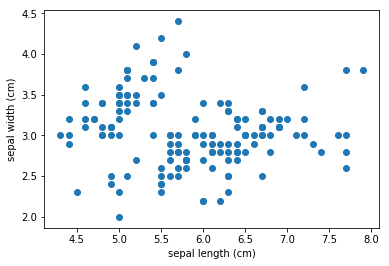

In [12]:
dataset = datasets.load_iris()

x = dataset.data[:, 0]
y = dataset.data[:, 1]

plt.xlabel(dataset.feature_names[0])
plt.ylabel(dataset.feature_names[1])
plt.scatter(x, y)
plt.show()

## <span style="color:#186678">K-means</span>


In [13]:
model = KMeans(n_clusters=3)
model.fit(dataset.data)

predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])
all_predictions = model.predict(dataset.data)

print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## <span style="color:#186678">T-SNE</span>


In [21]:
model = TSNE(learning_rate=100, n_components=3)
transformed = model.fit_transform(dataset.data)


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.2 µs


/bin/sh: -c: line 0: syntax error near unexpected token `alg.png'
/bin/sh: -c: line 0: `[alasdg](alg.png)'
